# TASK #1: PROJECT OVERVIEW 


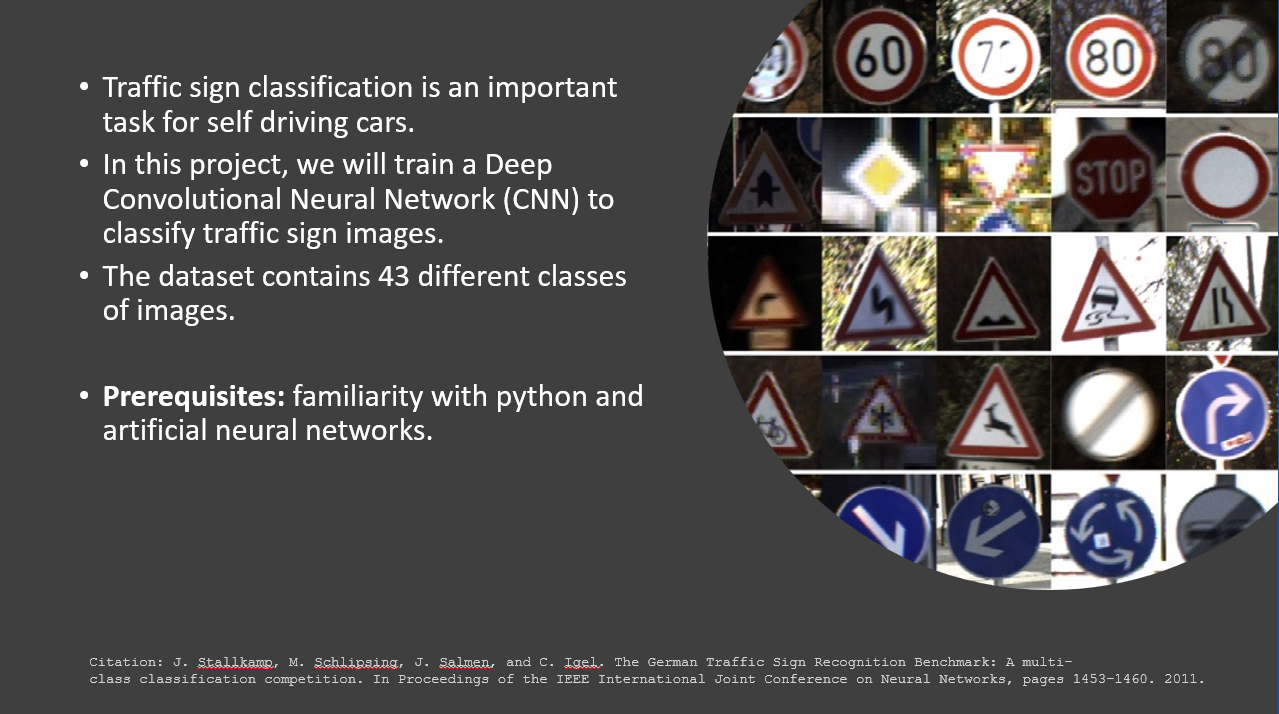

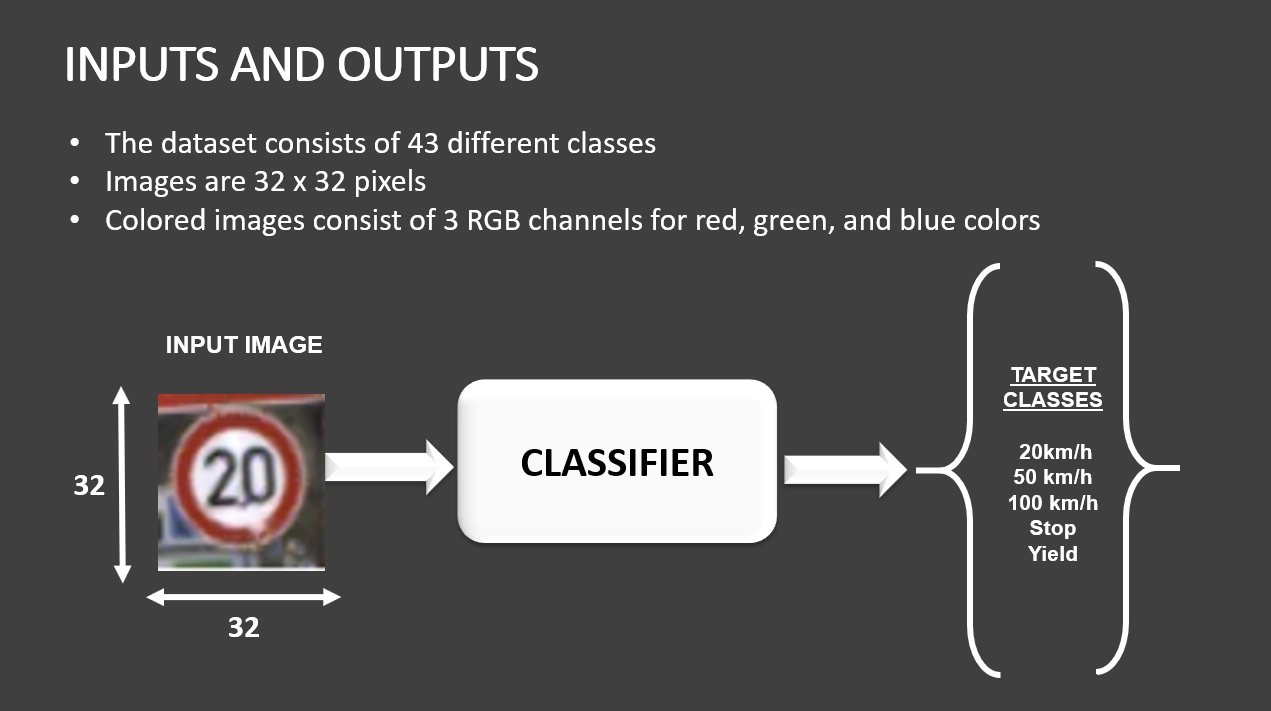

# TASK #2: IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

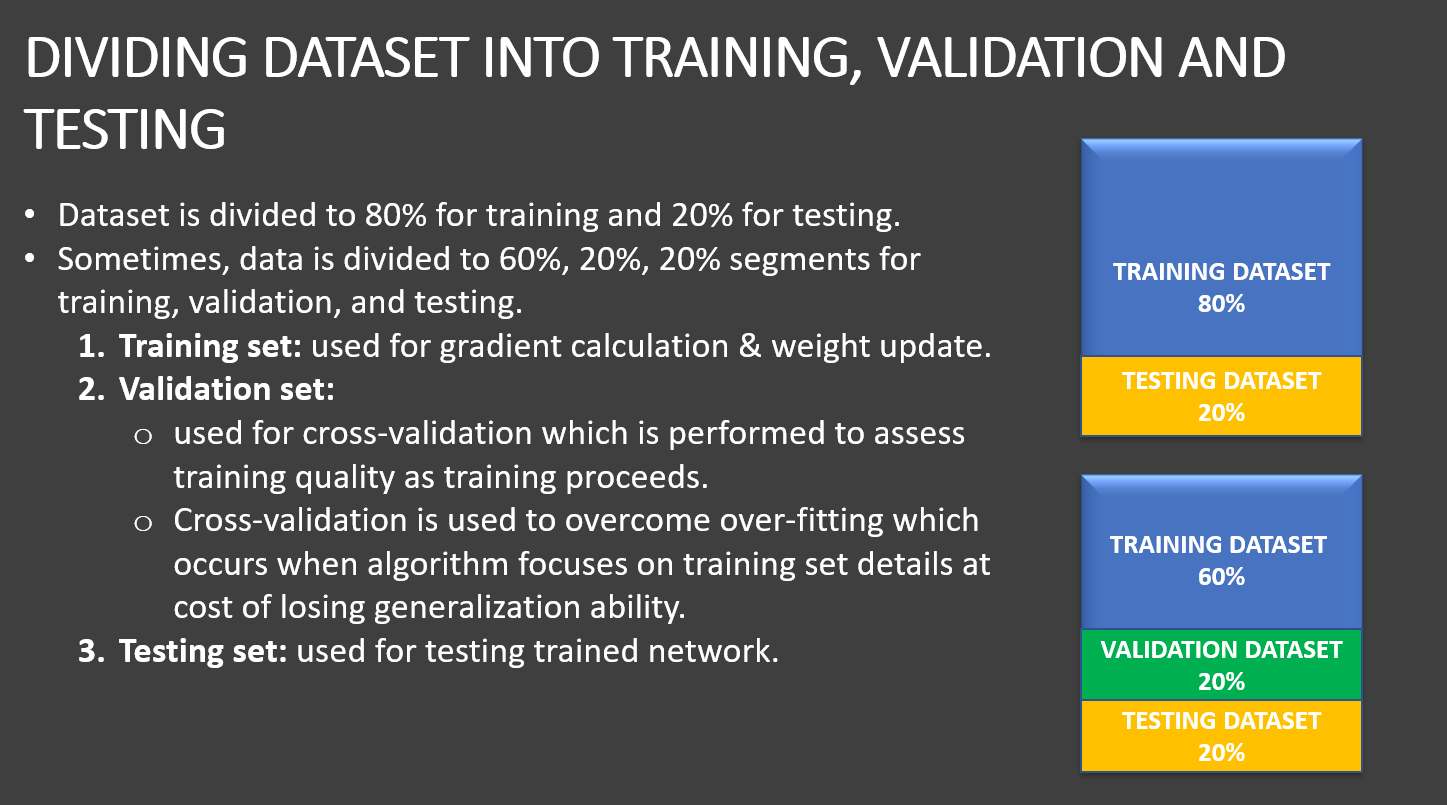

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
x_train,y_train = train['features'], train['labels']
x_valid,y_valid = valid['features'], valid['labels']
x_test,y_test = test['features'], test['labels']

In [10]:
x_train.shape
x_valid.shape
x_test.shape

(12630, 32, 32, 3)

In [11]:
y_train.shape
y_valid.shape
y_test.shape

(12630,)

# TASK #3: PERFORM IMAGES VISUALIZATION

35

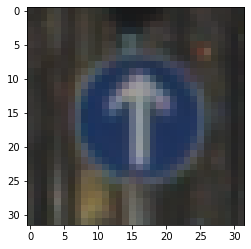

In [15]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

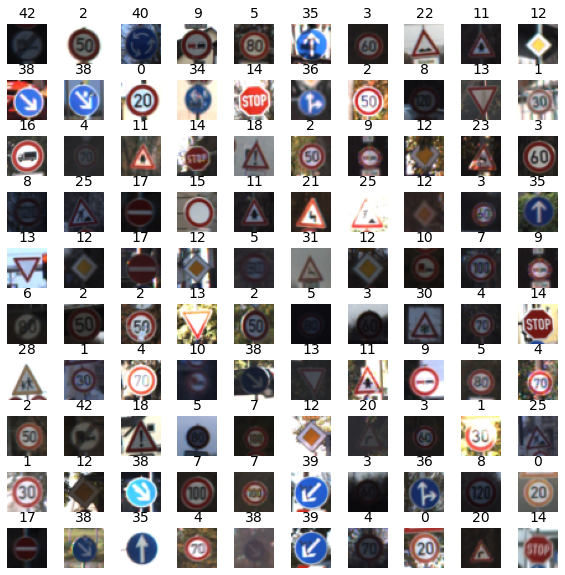

In [18]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid * L_grid):
    
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize=14)
    axes[i].axis('off')

plt.subplots_adjust(hspace =0.4)
    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [23]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)# we are shuffling to avoid same data continuously feed to the network
x_valid,y_valid = shuffle(x_valid,y_valid)
x_test, y_test = shuffle(x_test, y_test)

In [24]:
x_train_gray = np.sum(x_train/3,axis=3,keepdims=True) # converting rgb to gray scale
x_valid_gray = np.sum(x_valid/3,axis=3,keepdims=True) 
x_test_gray = np.sum(x_test/3,axis=3,keepdims=True) 

In [21]:
x_train_gray.shape

(34799, 32, 32, 1)

In [25]:
# normalization of gray scale images
x_train_gray_norm = (x_train_gray-128)/128
x_valid_gray_norm = (x_valid_gray-128)/128
x_test_gray_norm = (x_test_gray-128)/128

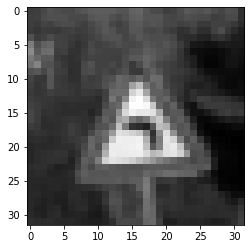

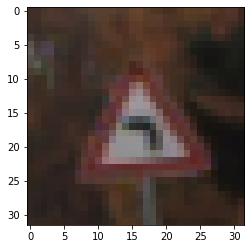

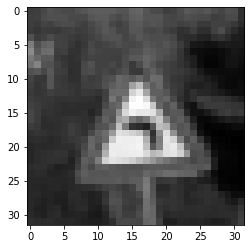

In [26]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

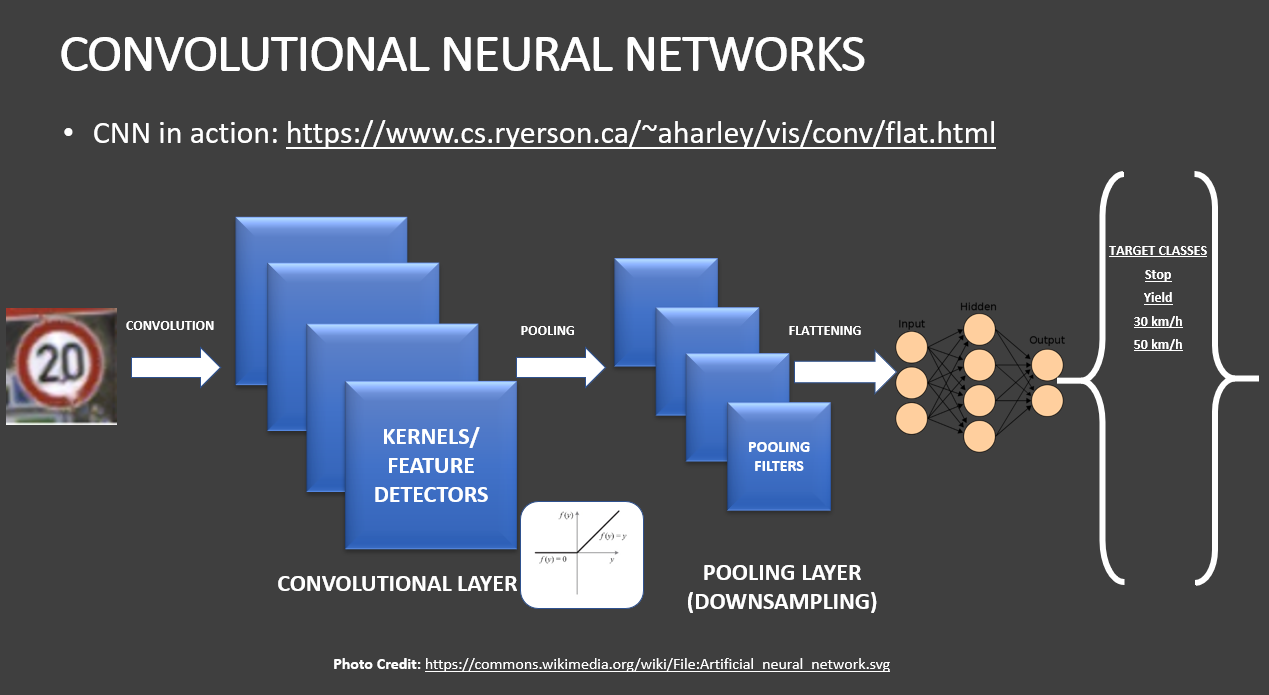

In [27]:
# The above link will help us to visualize the layer by layer output

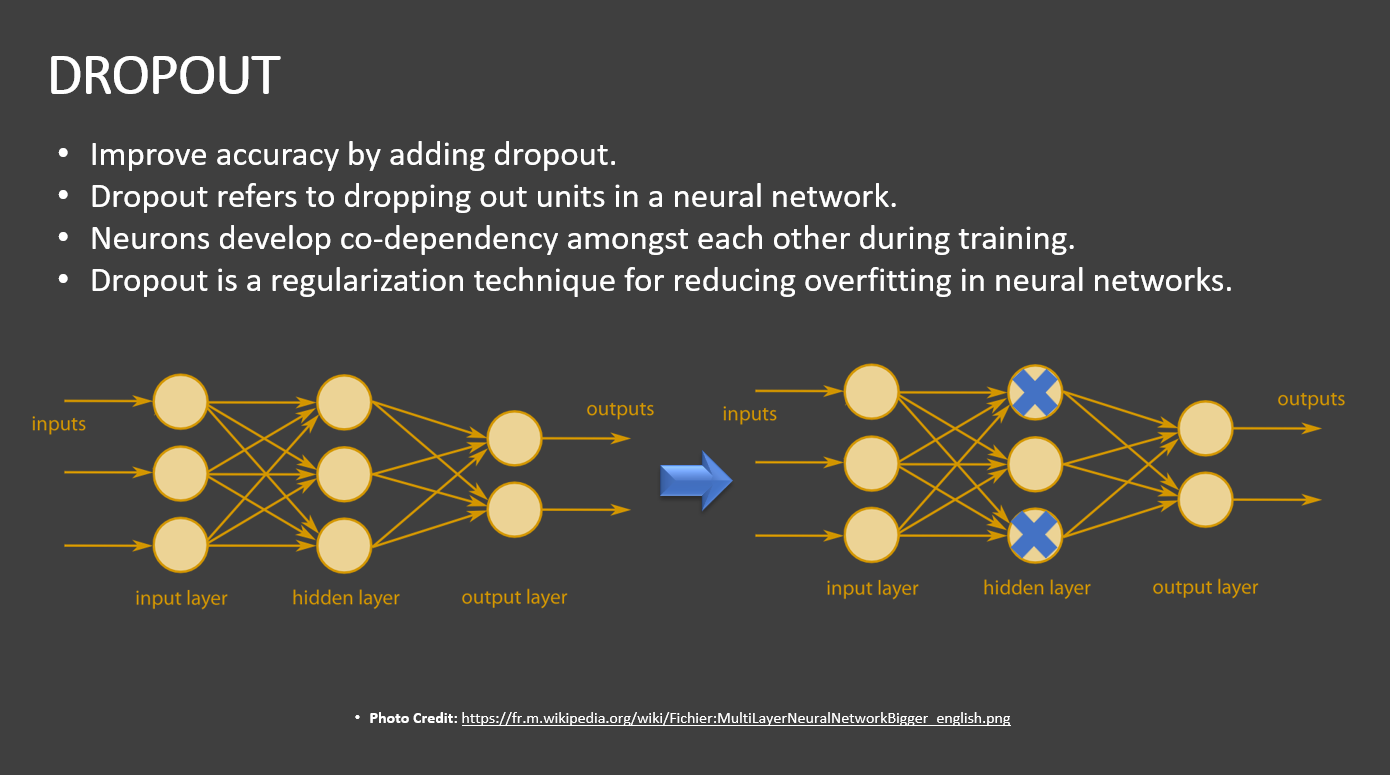

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [33]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()
cnn.add(layers.Conv2D(6,(5,5),activation ='relu',input_shape=(32,32,1))) # 6 conv of 5x5 size
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Dropout(0.4))  # Dropping 40 percent of neurons
cnn.add(layers.Conv2D(16,(5,5),activation='relu', input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())

cnn.add(layers.Flatten())

cnn.add(layers.Dense(120,activation='relu'))
cnn.add(layers.Dense(84,activation='relu'))
cnn.add(layers.Dense(43,activation='softmax'))
cnn.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [36]:
cnn.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy']) # as we more lables or classes here 43, more than 2, if 2 we can use binary cross entropy

In [40]:
hist = cnn.fit(x_train_gray_norm, y_train,
              batch_size =500, epochs=5, # we can increase epochs to improve accuracy
               verbose=1,validation_data=(x_valid_gray_norm,y_valid)) # 500images for 1 epoch, 

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 28s 791us/sample - loss: 3.1985 - accuracy: 0.1689 - val_loss: 2.6138 - val_accuracy: 0.3093
Epoch 2/5
34799/34799 [==============================] - 23s 658us/sample - loss: 1.8241 - accuracy: 0.4817 - val_loss: 1.4082 - val_accuracy: 0.5989
Epoch 3/5
34799/34799 [==============================] - 23s 659us/sample - loss: 1.1780 - accuracy: 0.6487 - val_loss: 1.0582 - val_accuracy: 0.6921
Epoch 4/5
34799/34799 [==============================] - 23s 668us/sample - loss: 0.9362 - accuracy: 0.7219 - val_loss: 0.8492 - val_accuracy: 0.7531
Epoch 5/5
34799/34799 [==============================] - 21s 610us/sample - loss: 0.7784 - accuracy: 0.7721 - val_loss: 0.7154 - val_accuracy: 0.7964


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

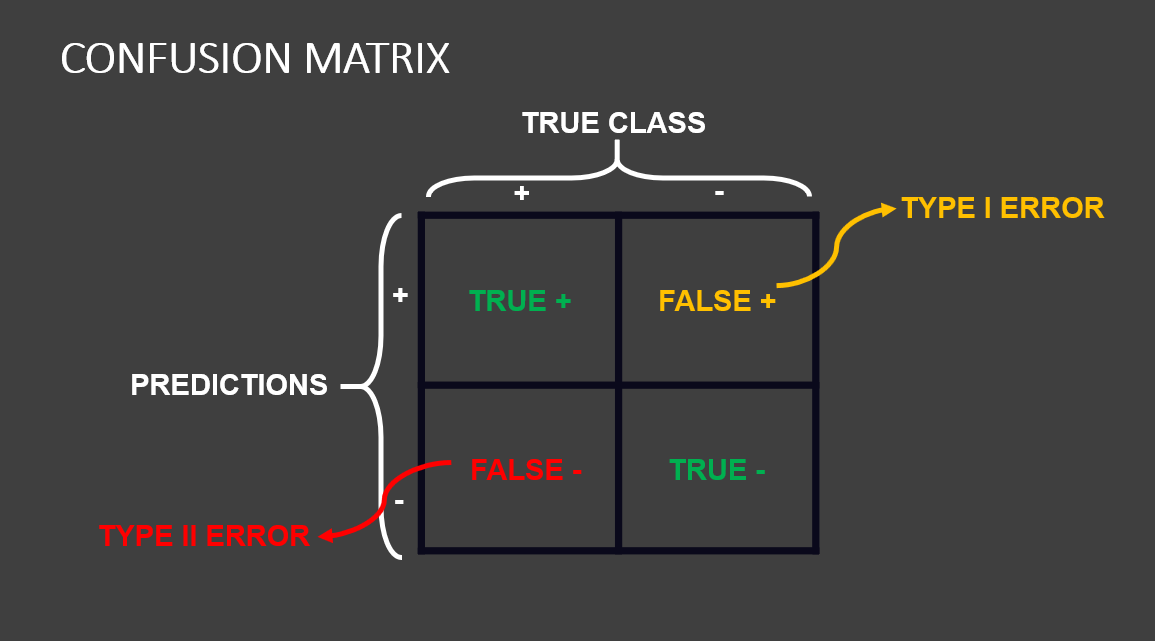

In [42]:
score = cnn.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 421us/sample - loss: 0.9477 - accuracy: 0.7617
Test Accuracy: 0.7616785168647766


In [41]:
history=hist # renaming the model history name from hist to history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

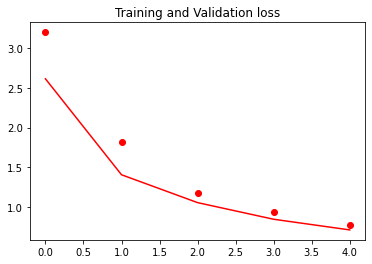

In [45]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r', label='Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation acuuracy')

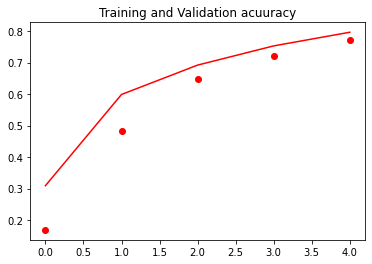

In [47]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training acuuracy')
plt.plot(epochs,val_accuracy,'r', label='Validation acuuracy')
plt.title('Training and Validation acuuracy')

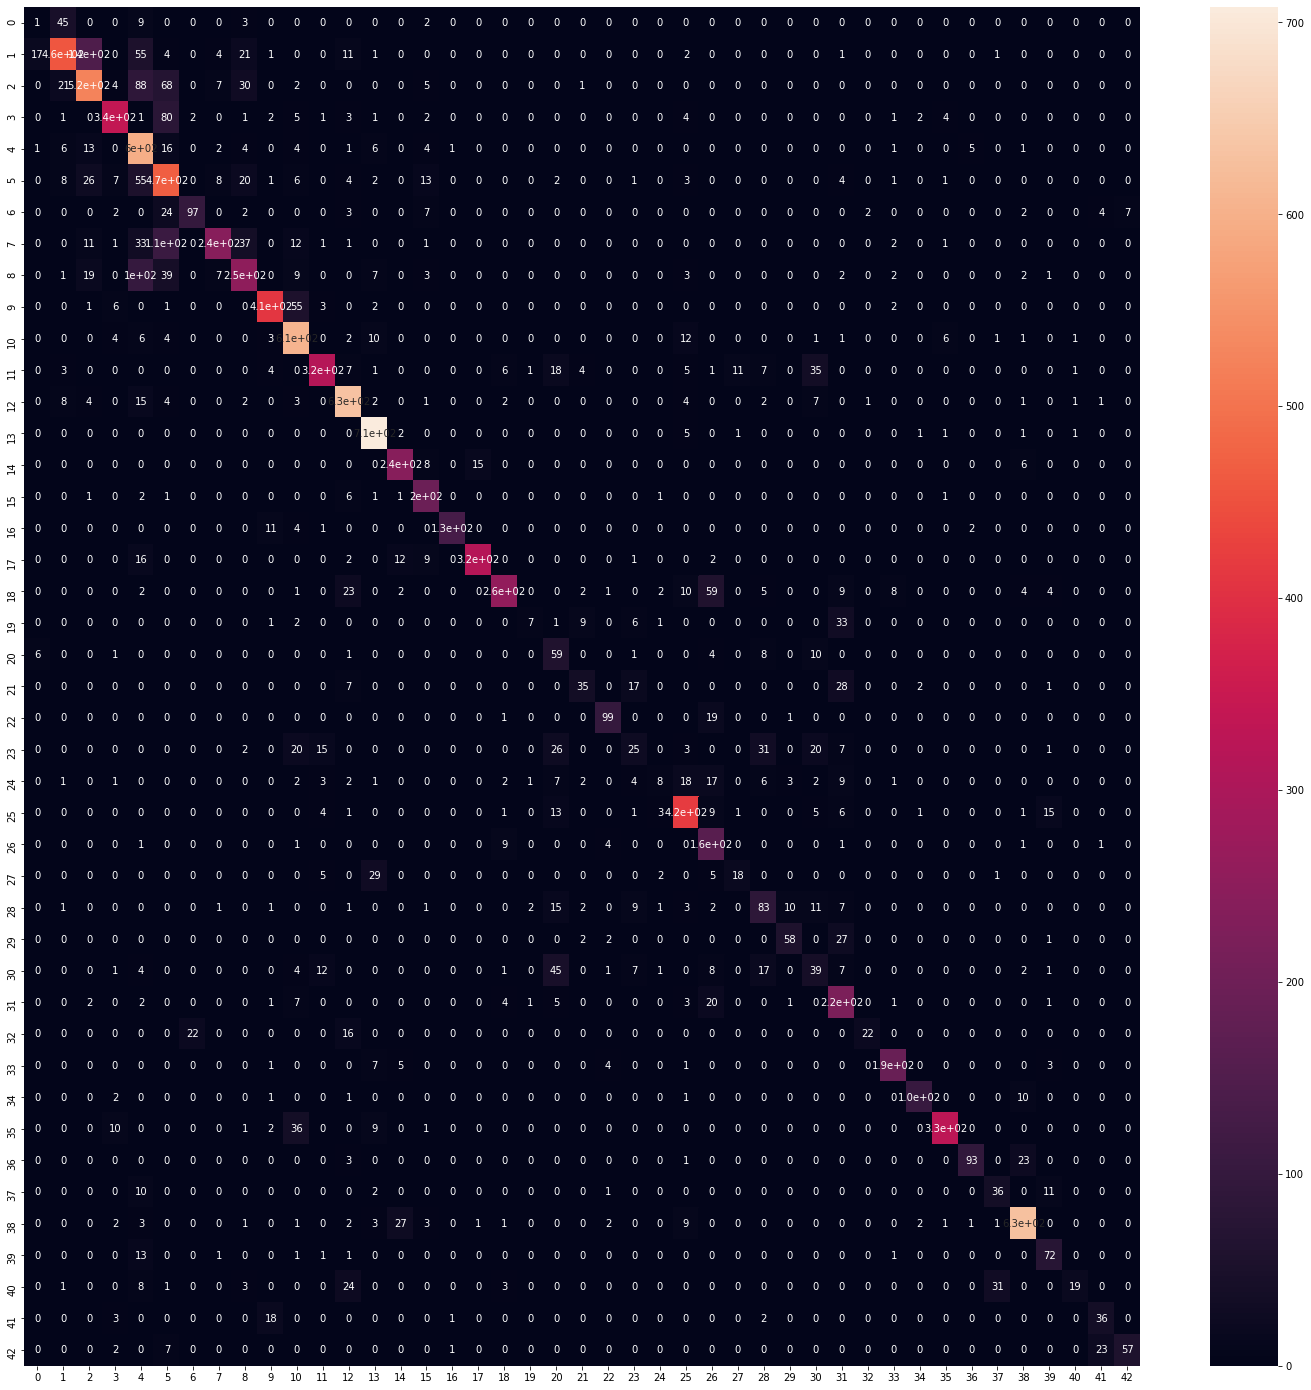

In [48]:
predicted_classes = cnn.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

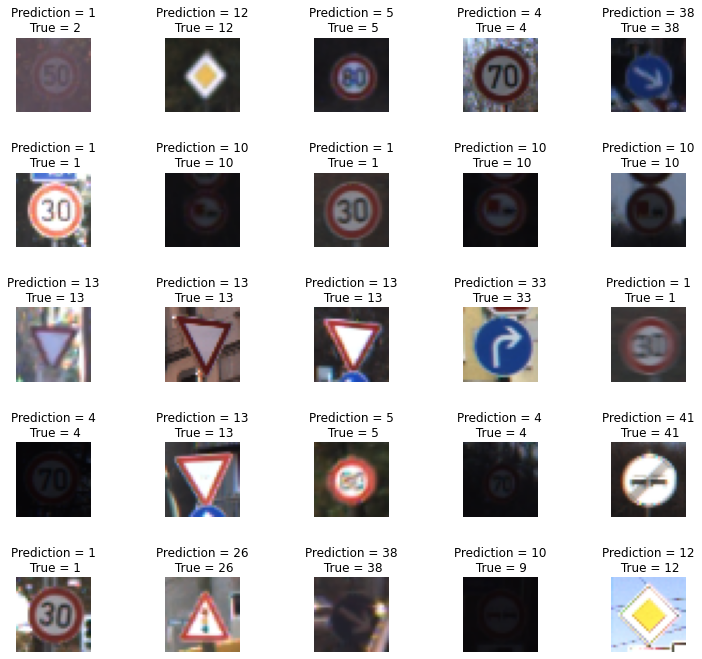

In [49]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453â€“1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }